# **GRIP Intership** **Task**

A LSTM mosel for stock prediction based on historic data and news headline sentiments

In [2]:
import pandas as pd
import numpy as np
import quandl
import re

In [3]:
#reading the news data
news = pd.read_csv('/content/drive/MyDrive/india-news-headlines.csv')
print("head: \n", news.head())

head: 
    publish_date  ...                                      headline_text
0      20010101  ...  win over cena satisfying but defeating underta...
1      20010102  ...  Status quo will not be disturbed at Ayodhya; s...
2      20010102  ...                Fissures in Hurriyat over Pak visit
3      20010102  ...              America's unwanted heading for India?
4      20010102  ...                 For bigwigs; it is destination Goa

[5 rows x 3 columns]


In [4]:
#setting the format of publish_date column in news dataset
news['publish_date'] = pd.to_datetime(news['publish_date'],format='%Y%m%d')
print("head: \n", news.head())
print("tail: \n", news.tail())

head: 
   publish_date  ...                                      headline_text
0   2001-01-01  ...  win over cena satisfying but defeating underta...
1   2001-01-02  ...  Status quo will not be disturbed at Ayodhya; s...
2   2001-01-02  ...                Fissures in Hurriyat over Pak visit
3   2001-01-02  ...              America's unwanted heading for India?
4   2001-01-02  ...                 For bigwigs; it is destination Goa

[5 rows x 3 columns]
tail: 
         publish_date  ...                                      headline_text
3297167   2020-06-30  ...      why tiktok removed 1 65 crore videos in india
3297168   2020-06-30  ...  apurva asrani calls alia bhatts mother soni ra...
3297169   2020-06-30  ...  kangana ranaut gets a doll version of herself ...
3297170   2020-06-30  ...  meezaan jaffrey reminisces his childhood days ...
3297171   2020-06-30  ...  prabhas20 titled as radhe shyam prabhas and po...

[5 rows x 3 columns]


In [5]:
print(len(news['headline_category'].unique()))
#since there are 1016 differe3nt types of news so lets select only business news
news = news[news['headline_category'].str.match('bus')]

1016


In [6]:
#dropping source(headline category) column from the news dataset
news = news.drop(['headline_category'], axis = 1)
#merging headlinetext if multiples for a single date
news = news.groupby('publish_date').agg({'headline_text': ', '.join}).reset_index() 

In [7]:
#reading the stock data from days the first day in the news headlines to the last day
s_date = news.iloc[0,0] #start date
e_date = news.iloc[-1,0] #end date
sensex = quandl.get("BSE/SENSEX",authtoken="rtHazKkf31D2niySJrF-", start_date = s_date, end_date = e_date)

print(sensex.head(), "\n boom!!!")

               Open     High      Low    Close
Date                                          
2001-01-04  4180.97  4180.97  4109.55  4115.37
2001-01-05  4116.34  4195.01  4115.35  4183.73
2001-01-08  4164.76  4206.72  4101.53  4120.43
2001-01-09  4114.74  4166.84  4101.01  4125.31
2001-01-10  4151.58  4155.86  4035.44  4047.64 
 boom!!!


Sentimental analysis of NEWS

In [8]:
import string
import nltk
from nltk.corpus import stopwords
import re

In [9]:
#reseting date as index...
news = news.set_index('publish_date')

In [10]:
#see how the text looks to decide on its cleaning
news.headline_text

publish_date
2001-01-04         Car dealers caught in Bihar sales tax ruling
2001-05-22    Re-negotiation best: Deshmukh; lenders' SOS to...
2001-05-28    Auto body drives in new classification norms, ...
2001-05-29    Ashok Leyland to cut jobs; divisions, 'Fixing ...
2001-05-30    Beware; the snoopware is watching you!, IA div...
                                    ...                        
2020-06-26    Preferential offers get more pricing options f...
2020-06-27    'Ashok Leyland independent biz; won't be impac...
2020-06-28    Ordinance to let RBI revive banks without mora...
2020-06-29    Techtonic Review: The OnePlus 8 and OnePlus 8 ...
2020-06-30    Solar plan to make Leh self-reliant hanging fi...
Name: headline_text, Length: 6878, dtype: object

In [11]:
  # NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

In [12]:
# scores for the news headlines
vader = SentimentIntensityAnalyzer()
vader.lexicon
news['compound'] = news['headline_text'].apply(lambda x: vader.polarity_scores(x)['compound'])
print(news.head())
print("BOOM!!! Its Done!!!")

                                                  headline_text  compound
publish_date                                                             
2001-01-04         Car dealers caught in Bihar sales tax ruling    0.0000
2001-05-22    Re-negotiation best: Deshmukh; lenders' SOS to...    0.4767
2001-05-28    Auto body drives in new classification norms, ...    0.6199
2001-05-29    Ashok Leyland to cut jobs; divisions, 'Fixing ...   -0.7906
2001-05-30    Beware; the snoopware is watching you!, IA div...    0.0000
BOOM!!! Its Done!!!


In [13]:
#lets start satcked lstm stock analysis
#since we hav already read sensex data
#so lets start here we go!!

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [15]:
data = sensex.join(news)

In [16]:
data = data[['compound', 'Open']]
data['compound'] = data['compound'].replace(np.nan, 0)
print(data.head())
print(data.isna().sum())

            compound     Open
Date                         
2001-01-04       0.0  4180.97
2001-01-05       0.0  4116.34
2001-01-08       0.0  4164.76
2001-01-09       0.0  4114.74
2001-01-10       0.0  4151.58
compound    0
Open        0
dtype: int64


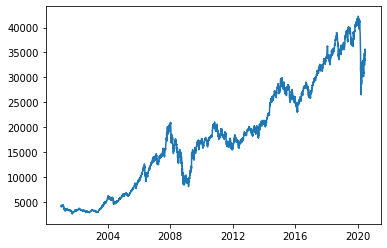

In [17]:
plt.plot(data['Open']) 

In [62]:
#lets split the data into training, validation and test set
#keeping the ratio of 80:20
data_train, data_test = data[0:int(len(data)*0.8)], data[int(len(data)*0.8):]
data_train.shape, data_test.shape

((3875, 2), (969, 2))

In [61]:
#creating matrix 
# references: https://www.youtube.com/watch?v=H6du_pfuznE
def create_dataset(dataset, score_vader, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		b = score_vader[i+look_back]
		dataX.append(np.append(a,b))
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [63]:
#data scalling
#lstm is sensitive to the scale of data
from sklearn.preprocessing import MinMaxScaler
data_scaling1 = MinMaxScaler(feature_range=(0,1))
data_train_scaled = data_scaling1.fit_transform(data_train['Open'].values.reshape(-1, 1))
data_test_scaled = data_scaling1.transform(data_test['Open'].values.reshape(-1, 1))

data_scaling2 = MinMaxScaler()
training_compound_scaled = data_scaling2.fit_transform(data_train['compound'].values.reshape(-1, 1))
test_compound_scaled = data_scaling2.transform(data_test['compound'].values.reshape(-1, 1))

In [64]:
# creating dataset with the last 45 days historic data and sentiments score of todays news headlines
train_x, train_y = create_dataset(data_train_scaled, training_compound_scaled, 45)
test_x, test_y = create_dataset(data_test_scaled, test_compound_scaled, 45)

In [65]:
#check shape of data
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(3829, 46) (3829,)
(923, 46) (923,)


In [66]:
#creating arrays
#reshaping the input x dataset to 3 dimensions
train_x, train_y = np.array(train_x), np.array(train_y)
train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))

test_x, test_y = np.array(test_x), np.array(test_y)
test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))

In [67]:
# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(train_x.shape[1], 1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
#reshaping data to three d
model.fit(train_x, train_y, validation_data = (train_x, train_y), epochs=50, batch_size=75)

Epoch 1/50
52/52 [==============================] - 6s 125ms/step - loss: 0.0240 - val_loss: 8.2984e-04
Epoch 2/50
52/52 [==============================] - 6s 116ms/step - loss: 5.4843e-04 - val_loss: 4.7209e-04
Epoch 3/50
52/52 [==============================] - 6s 119ms/step - loss: 4.7312e-04 - val_loss: 4.4984e-04
Epoch 4/50
52/52 [==============================] - 6s 124ms/step - loss: 4.6496e-04 - val_loss: 4.6188e-04
Epoch 5/50
52/52 [==============================] - 6s 116ms/step - loss: 4.4542e-04 - val_loss: 4.5210e-04
Epoch 6/50
52/52 [==============================] - 6s 122ms/step - loss: 4.3724e-04 - val_loss: 5.7970e-04
Epoch 7/50
52/52 [==============================] - 6s 123ms/step - loss: 4.4518e-04 - val_loss: 4.0788e-04
Epoch 8/50
52/52 [==============================] - 6s 119ms/step - loss: 4.0774e-04 - val_loss: 3.7585e-04
Epoch 9/50
52/52 [==============================] - 6s 118ms/step - loss: 3.7616e-04 - val_loss: 3.7532e-04
Epoch 10/50
52/52 [=============

In [68]:
train_predict = model.predict(train_x) 
test_predict = model.predict(test_x)
train_predict

array([[0.05697743],
       [0.05584794],
       [0.05412764],
       ...,
       [0.92160225],
       [0.93333906],
       [0.9179078 ]], dtype=float32)

In [69]:
#traonsform to orignal form
train_predict1 = data_scaling1.inverse_transform(train_predict) 
test_predict1 = data_scaling1.inverse_transform(test_predict) 
print(train_predict1)

[[ 4178.25  ]
 [ 4147.3975]
 [ 4100.407 ]
 ...
 [27795.807 ]
 [28116.4   ]
 [27694.889 ]]


In [70]:
train_y_re = data_scaling1.inverse_transform(train_y.reshape(-1,1))
test_y_re = data_scaling1.inverse_transform(test_y.reshape(-1,1))

In [71]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
print("RMSE for train dataset:", math.sqrt(mean_squared_error(train_y_re,train_predict1)))

RMSE for train dataset: 406.1279222390244


In [88]:
print("RMSE for test dataset:", math.sqrt(mean_squared_error(test_y_re,test_predict1)))

RMSE for test dataset: 768.1522469377109


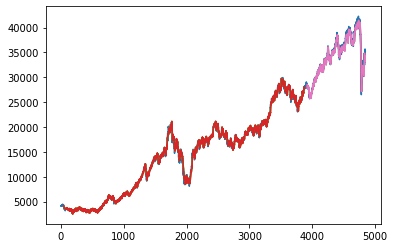

In [89]:
# Plotting 
# shift train predictions for plotting
# reference : https://www.youtube.com/watch?v=H6du_pfuznE
look_back=45
trainPredictPlot = numpy.empty_like(data1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict1)+look_back, :] = train_predict1
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict1)+(look_back*2)+1:len(data1)-1, :] = test_predict1
# plot baseline and predictions
plt.plot(data1['Open'])
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

references:
https://www.youtube.com/watch?v=H6du_pfuznE

https://towardsdatascience.com/nlp-in-python-data-cleaning-6313a404a470

https://github.com/Shagun-25/Nifty-Index-Prediction-Using-News-Sentiments/blob/master/Stock_Prediction.ipynb

https://predictivehacks.com/how-to-run-sentiment-analysis-in-python-using-vader/
